# Task 1.1. 

## Practical task. Titanic data analysis

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

Reading data from a file into memory as a Pandas.DataFrame object

In [2]:
current_dir = os.getcwd()
relative_path = 'titanic_train.csv'
file_path = os.path.join(current_dir, relative_path)
data = pd.read_csv(file_path)

#Data is presented in the form of a table. Let's take a look at the first 5 lines:**

In [3]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


**Let's take the first 10 elements of the Parch column - the number of parents and children of the passenger on board:**

In [4]:
data['Parch'][:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

**We select passengers who boarded in Cherbourg (Embarked = C) and paid more than 200 USD. (fare> 200).**

Make sure you understand how this design works. <br />
If not, see how the expression in brackets is evaluated.

In [5]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


**1. How many men / women were on board?**

In [6]:
maledate=data[(data['Sex'] == 'male')] 
print('number of male:',len(maledate))
femaledate=data[(data['Sex'] == 'female')]
print('number of female:',len(femaledate))

number of male: 577
number of female: 314


**2. Print the distribution of deaths/survivors for Pclass (socioeconomic status). Additionally - the same distribution, but taking into account gender. (no tables, only plot)**

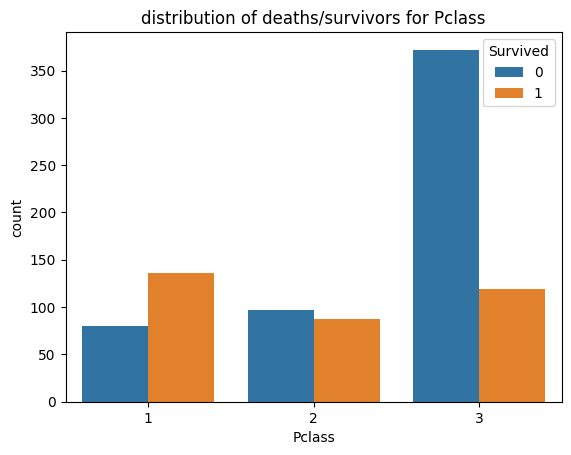

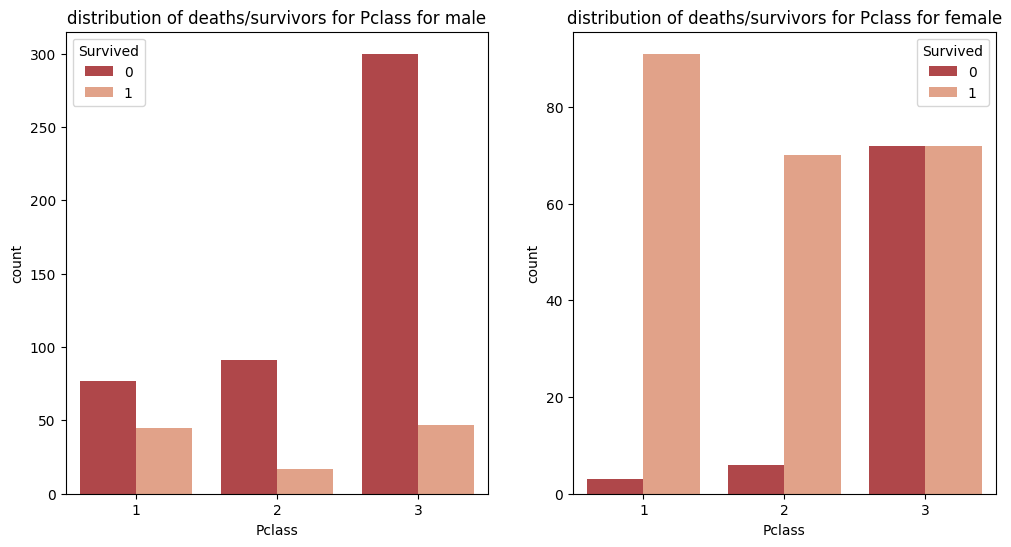

In [7]:
sns.countplot(x=data['Pclass'], hue=data['Survived'])
plt.title("distribution of deaths/survivors for Pclass")
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=data[data['Sex']=='male']['Pclass'], hue=data[data['Sex']=='male']['Survived'],
              palette=sns.color_palette("RdBu"), hue_order=[0, 1])
plt.title("distribution of deaths/survivors for Pclass for male")
plt.subplot(1, 2, 2)
sns.countplot(x=data[data['Sex']=='female']['Pclass'], hue=data[data['Sex']=='female']['Survived'],
              palette=sns.color_palette("RdBu"), hue_order=[0, 1])
plt.title("distribution of deaths/survivors for Pclass for female")
plt.show()

**3. How much did one passenger pay on average? Find the variance of this quantity. How much did all passengers pay in total?**

In [8]:
mean_value=data['Fare'].mean()
varience=data['Fare'].var()
sum_value=data['Fare'].sum()
print("Mean:",mean_value)
print("Varinence:",varience)
print("Sum：",sum_value)

Mean: 32.204207968574636
Varinence: 2469.436845743116
Sum： 28693.9493


**4. Is it true that young people survived more often (more likely) than old people? Let "young" - those who are under 30, and "old" - those who are over 60.**

In [9]:
 for i in pd.isnull(data['Age']):
  if i is True:
   data.loc[pd.isnull(data['Age']), 'Age'] = np.nan
OldData=data[(data['Age'] > 60) & (data['Survived'] == 1)]
Oldspace = data[data['Age'] > 60]
YoungData=data[(data['Age'] < 30) & (data['Survived'] == 1)]
Youngsample=data[(data['Age']<30) ]  
Olderly_prob=len(OldData)/len(Oldspace)
Young_prob=len(YoungData)/len(Youngsample)
print('Survival rate of the olderly:{:.2f}%'.format(Olderly_prob*100))
print('Survival rate of the YoungYoung:{:.2f}%'.format(Young_prob*100))                
if Olderly_prob>Young_prob:
  print('it is false that young people survived more often  than old people')
else:
  print('it is true that young people survived more often  than old people')

Survival rate of the olderly:22.73%
Survival rate of the YoungYoung:40.62%
it is true that young people survived more often  than old people


**5. Is it true that women survived more often than men?**

In [10]:
WomenData=data[(data['Sex'] =='female') & (data['Survived'] == 1)]
Womenspace = data[(data['Sex'] =='female')]
MenData=data[(data['Sex'] =='male') & (data['Survived'] == 1)]
Menspace = data[(data['Sex'] =='male')]
Men_prob=len(MenData)/len(Menspace)
Women_prob=len(WomenData)/len(Youngsample)
print('Survival rate of the Men:{:.2f}%'.format(Men_prob*100))
print('Survival rate of the Women:{:.2f}%'.format(Women_prob*100))
if len(WomenData)>len(MenData):
  print('it is true that women survived more often than men')
else:
  print('it is false that women survived more often than men')

Survival rate of the Men:18.89%
Survival rate of the Women:60.68%
it is true that women survived more often than men


**6. What's the most popular name among male Titanic passengers?**

In [35]:
first_names=[]
for i in Menspace['Name']:
    name_parts1 = i.split(",")
    titl_name = name_parts1[1]
    name_parts2 = titl_name.split(".")
    sub_name = name_parts2[1] 
    name_parts3=sub_name.split(" ")
    if len(name_parts3) > 1:
        first_name = name_parts3[1]
        first_names.append(first_name)
    else:
        first_names.append(sub_name)
g = max(set(first_names), key = first_names.count)
print('The most popular name among males:', g)


The most popular name among males: William


**7. Compare the distribution of ticket prices between the rescued and the dead. (plots)**

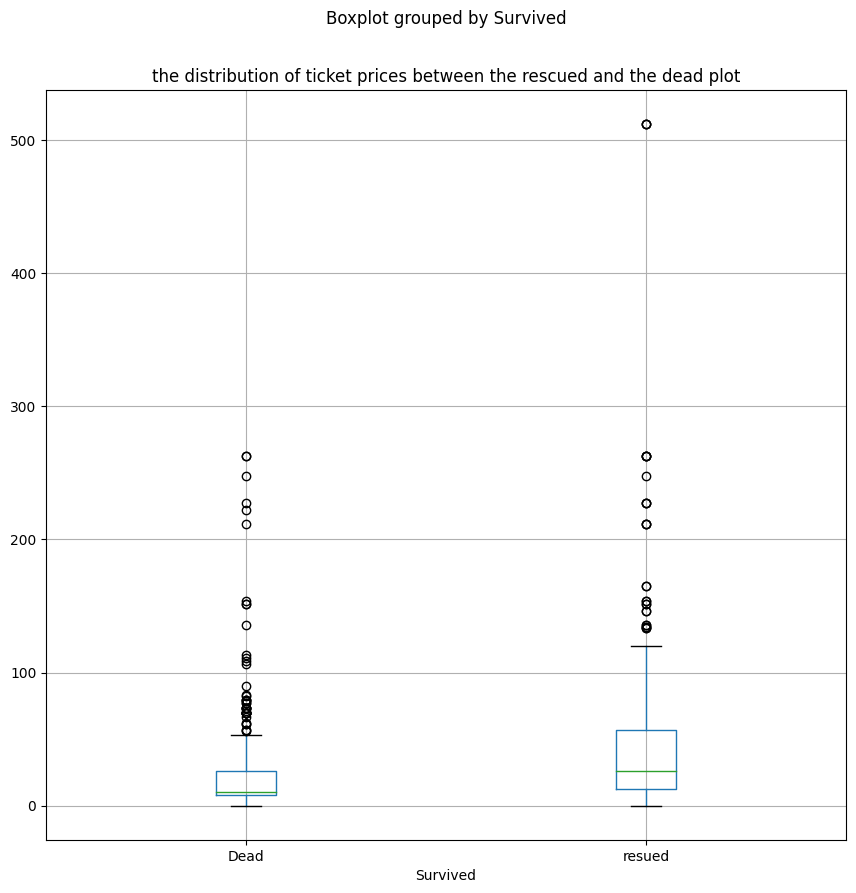

In [12]:
data.boxplot(column='Fare',  by='Survived', figsize=(10,10))
plt.xticks([1, 2], ['Dead', 'resued'])
plt.title('the distribution of ticket prices between the rescued and the dead plot')
plt.show()

**8. How does the average age of men / women differ by class of service?**

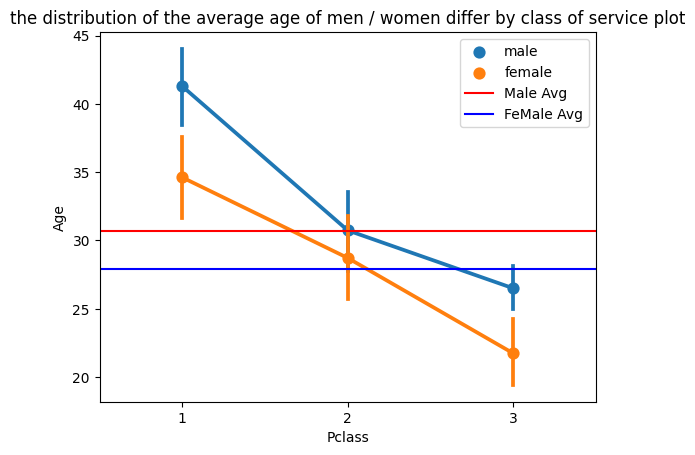

In [13]:
anxes=sns.pointplot(data=data, x='Pclass', y='Age', hue='Sex')
anxes.axhline(y=maledate['Age'].mean(), color='red', linestyle='solid',label='Male Avg')
anxes.axhline(y=femaledate['Age'].mean(), color='blue', linestyle='solid',label='FeMale Avg')
plt.title('the distribution of the average age of men / women differ by class of service plot')
plt.legend()
plt.show()